In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
#Tensorflow and its datasets
import tensorflow as tf
import tensorflow_datasets as tfds

c:\Users\Aadhith\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [42]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [44]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

Pre Processing: Normalizing images

In [45]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

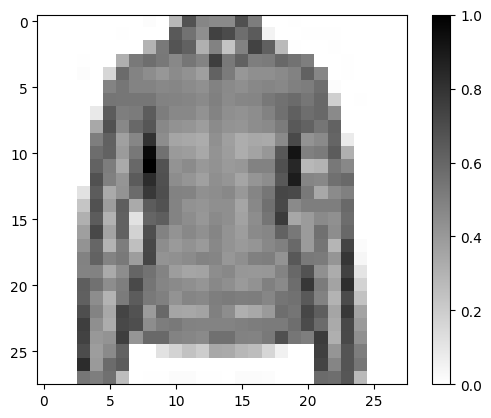

In [46]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

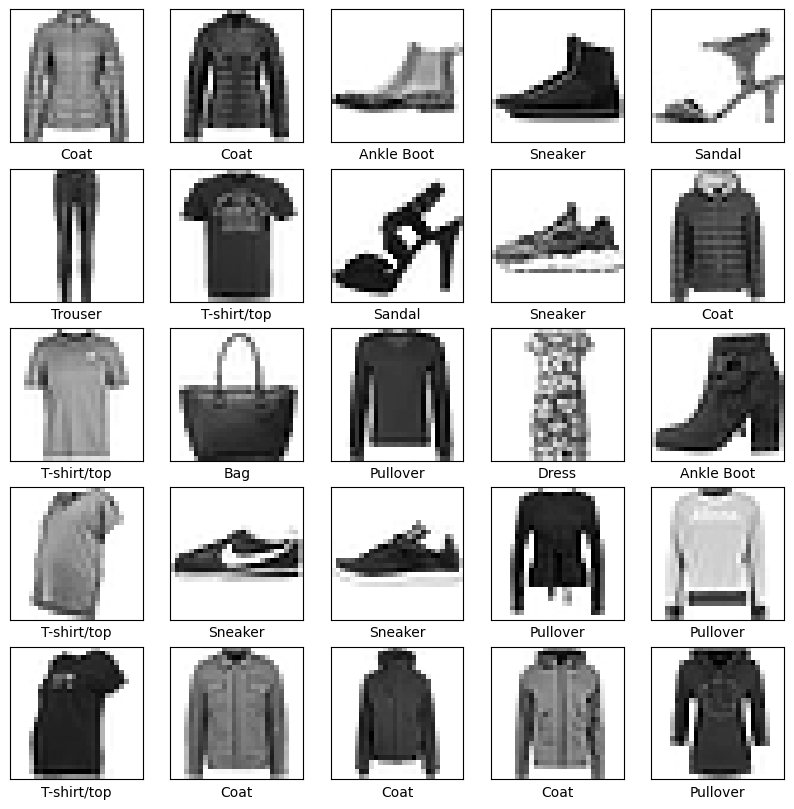

In [47]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

# MODEL 1 :

CNN:

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

Training :

In [24]:
history = model.fit(train_dataset, epochs=10, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.0537 - accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0480 - accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0419 - accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0331 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0323 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0272 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0251 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0232 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0193 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 46s 24m

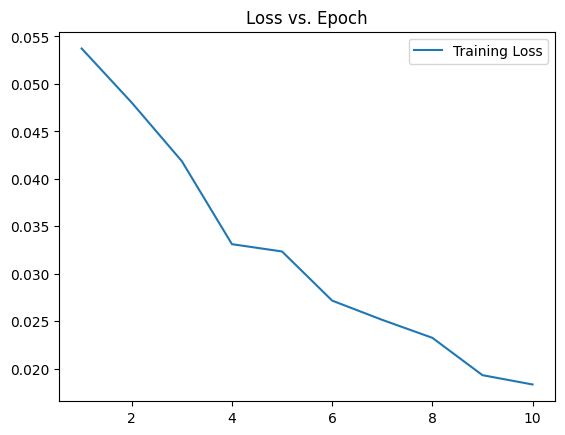

In [28]:
epochs=(1,2,3,4,5,6,7,8,9,10)
train_loss = history.history['loss']

# Plot the loss values against the epochs
plt.plot(epochs, train_loss, label='Training Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

Evaluation :

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps= math.ceil(num_test_examples/32))
test_accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.3135 - accuracy: 0.9170


0.9169999957084656

In [16]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 115ms/step


In [17]:
def plot_image (i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    predicted_label = np.argmax (predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label],
    100*np.max(predictions_array), class_names [true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax (predictions_array)
    thisplot [predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

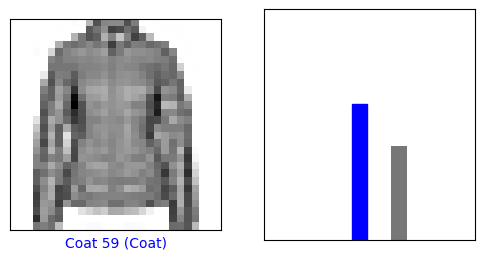

In [18]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

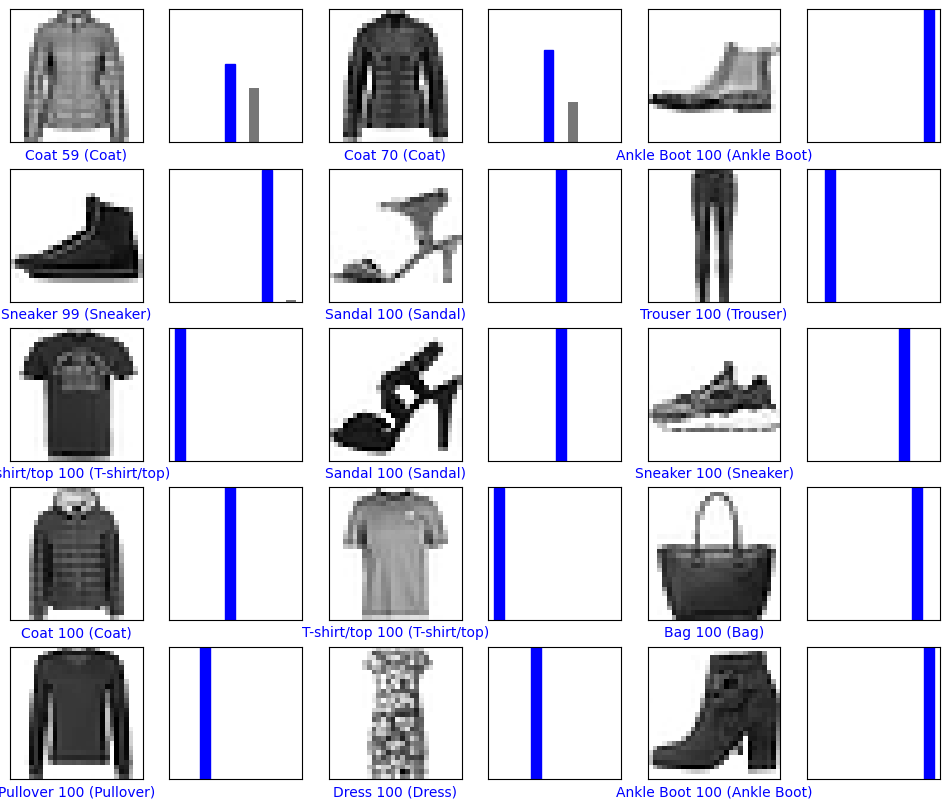

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

# MODEL 2:

One more Dense layer added

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training:

In [53]:
history = model.fit(train_dataset, epochs=10, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10


1875/1875 [==============================] - 32s 16ms/step - loss: 0.3915 - accuracy: 0.8600
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2613 - accuracy: 0.9046
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2163 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1872 - accuracy: 0.9305
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1588 - accuracy: 0.9407
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1344 - accuracy: 0.9496
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1166 - accuracy: 0.9570
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0964 - accuracy: 0.9647
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0833 - accuracy: 0.9684
Epoch 10/10
1875/1875 [==============================] - 31s 16ms/step - lo

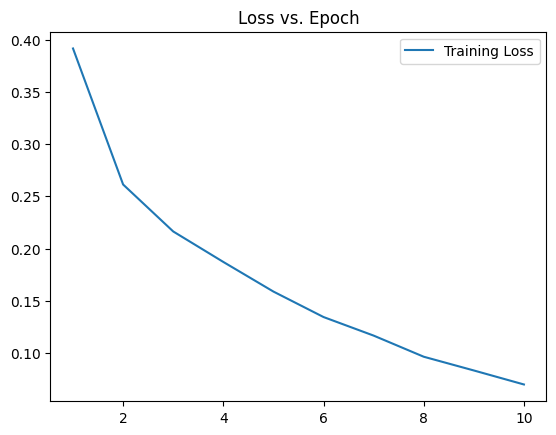

In [54]:
epochs=(1,2,3,4,5,6,7,8,9,10)
train_loss = history.history['loss']

# Plot the loss values against the epochs
plt.plot(epochs, train_loss, label='Training Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

Evaluation:

In [55]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps= math.ceil(num_test_examples/32))
test_accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.3269 - accuracy: 0.9180


0.9179999828338623

In [56]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 86ms/step


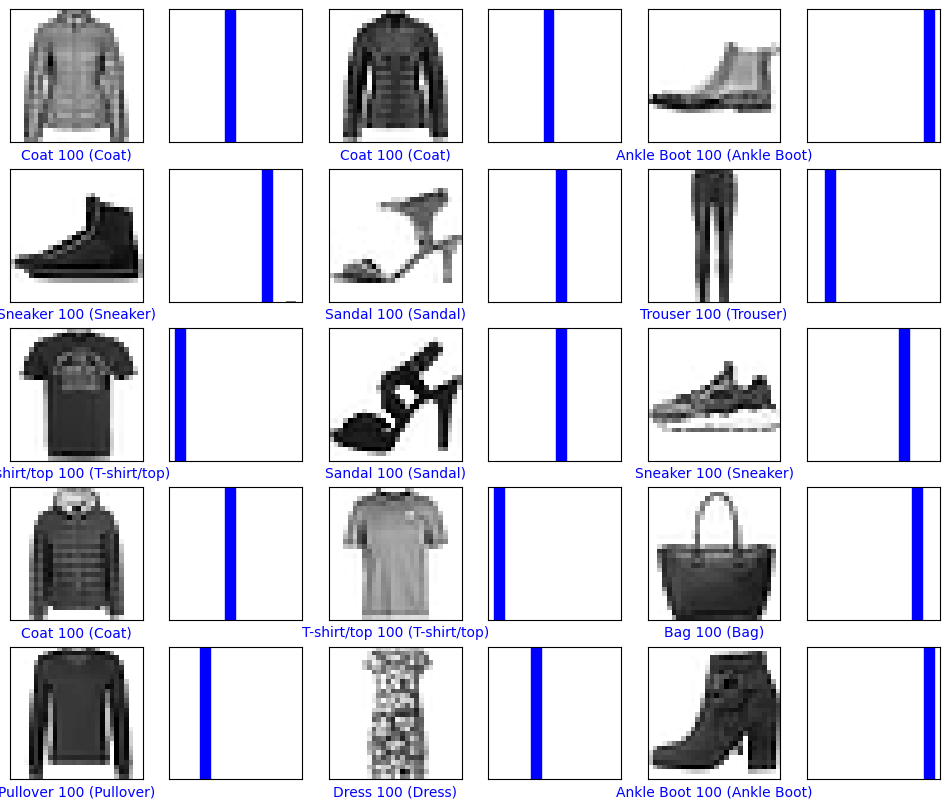

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)